In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
wnba = pd.read_csv("wnba.csv")

In [3]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [4]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [37]:
wnba.iloc[:,:11]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R
...,...,...,...,...,...,...,...,...,...,...,...
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,6
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,9
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,2
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,8


In [6]:
wnba["Experience"].value_counts(dropna=False)

R     23
3     19
6     14
5     14
1     12
2     11
4     11
9     11
10     5
12     4
11     4
7      4
8      3
13     3
14     3
15     2
Name: Experience, dtype: int64

In [7]:
pd.isnull(np.nan)

True

In [8]:
def category(x):
    if pd.isnull(x):
        return "Rookie"
    elif 0 < x <= 3:
        return "Litte Experienced"
    elif 3 < x <= 5:
        return "Experienced"
    elif 5 < x <= 10:
        return "Very Experienced"
    elif x > 10:
        return "Veteran"

In [9]:
wnba["Experience"].dtype

dtype('O')

In [10]:
# wnba["Experience"].astype(int)

In [11]:
wnba["ordinal_Exp"] =\
pd.to_numeric(wnba["Experience"], errors = "coerce").apply(category)

In [12]:
value = wnba["ordinal_Exp"].value_counts().iloc[[3,0,2,1,4]]

In [13]:
value

Rookie               23
Litte Experienced    42
Experienced          25
Very Experienced     37
Veteran              16
Name: ordinal_Exp, dtype: int64

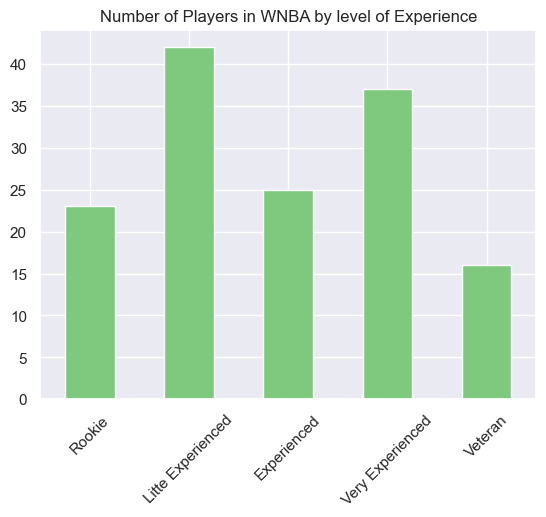

In [14]:
# absolute frq

value.plot(kind = "bar", colormap = plt.cm.Accent, rot = 45, \
          title = "Number of Players in WNBA by level of Experience")

plt.show()

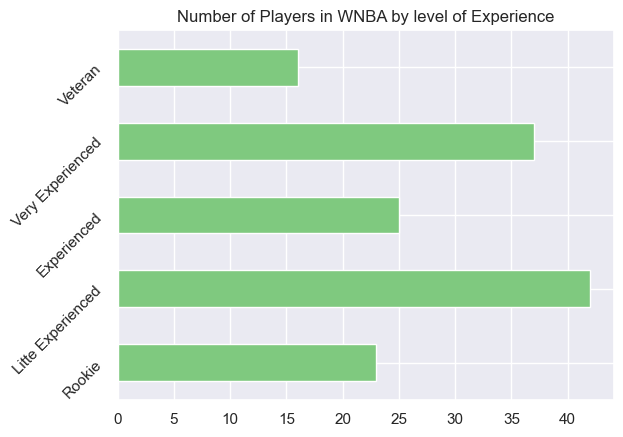

In [15]:
# absolute frq

value.plot(kind = "barh", colormap = plt.cm.Accent, rot = 45, \
          title = "Number of Players in WNBA by level of Experience")

plt.show()

In [16]:
value_1 = (wnba["ordinal_Exp"].value_counts(normalize=True)*100).iloc[[3,0,2,1,4]]

In [17]:
value_1

Rookie               16.083916
Litte Experienced    29.370629
Experienced          17.482517
Very Experienced     25.874126
Veteran              11.188811
Name: ordinal_Exp, dtype: float64

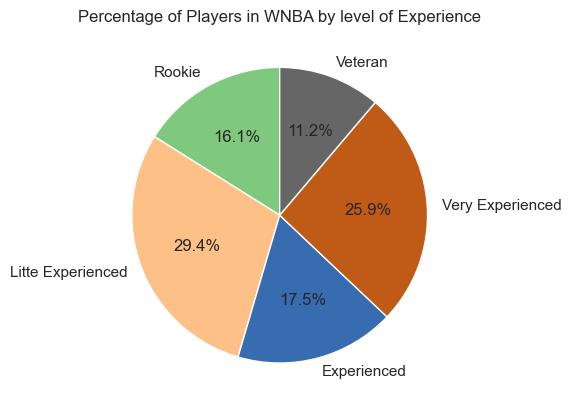

In [18]:
# Relative frq

value.plot(kind = "pie", colormap = plt.cm.Accent, rot = 45, \
          title = "Percentage of Players in WNBA by level of Experience",\
          startangle = 90, autopct = "%.1f%%")

plt.ylabel("")
plt.show()

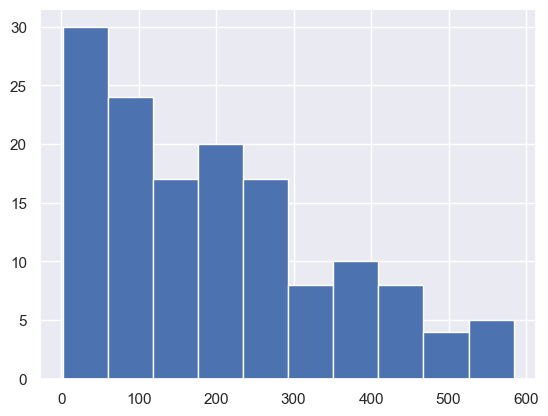

In [19]:
# Histgram

wnba["PTS"].hist()

plt.show()

In [20]:
wnba["PTS"].value_counts(bins = 10)

(1.417, 60.2]     30
(60.2, 118.4]     24
(176.6, 234.8]    20
(118.4, 176.6]    17
(234.8, 293.0]    17
(351.2, 409.4]    10
(293.0, 351.2]     8
(409.4, 467.6]     8
(525.8, 584.0]     5
(467.6, 525.8]     4
Name: PTS, dtype: int64

In [21]:
value.index

Index(['Rookie', 'Litte Experienced', 'Experienced', 'Very Experienced',
       'Veteran'],
      dtype='object')

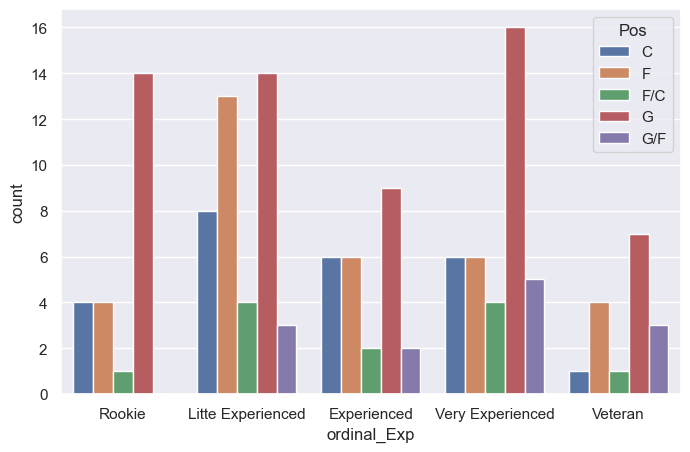

In [22]:
fig = plt.figure(figsize=(8,5))

sns.countplot(data = wnba, x = "ordinal_Exp",\
order = ['Rookie', 'Litte Experienced', 'Experienced', 'Very Experienced','Veteran'],\
hue = "Pos",\
hue_order = ["C","F","F/C","G","G/F"])

plt.show()

In [23]:
wnba["MIN"].mean()

496.97202797202794

In [24]:
wnba["Age"].mean()

27.076923076923077

In [25]:
wnba["min_mean_relative"] = wnba["MIN"].apply(lambda x: "average or above" if x >= 497 else "below average")

In [26]:
wnba[["MIN","min_mean_relative"]]

,MIN,min_mean_relative
0,173,below average
1,947,average or above
2,617,average or above
3,721,average or above
4,137,below average
...,...,...
138,861,average or above
139,127,below average
140,671,average or above
141,952,average or above


In [27]:
wnba["age_mean_relative"] = wnba["Age"].apply(lambda x: "Old" if x >= 27 else "Young")

In [28]:
wnba[["Age","age_mean_relative"]]

,Age,age_mean_relative
0,23,Young
1,35,Old
2,26,Young
3,28,Old
4,23,Young
...,...,...
138,27,Old
139,32,Old
140,32,Old
141,29,Old


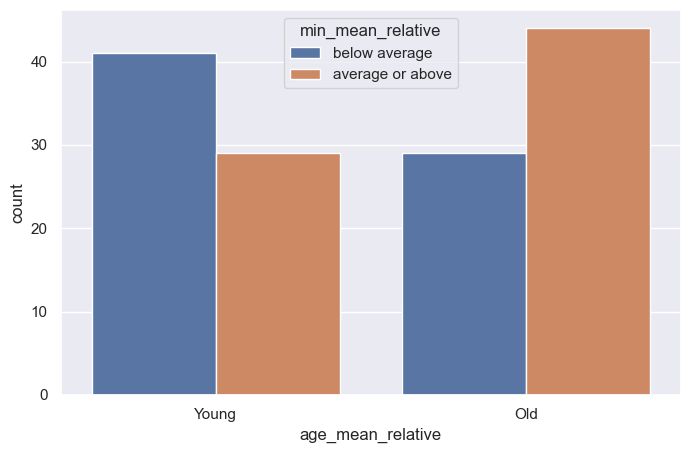

In [29]:
fig = plt.figure(figsize=(8,5))

sns.countplot(data = wnba, x = "age_mean_relative", hue = "min_mean_relative")

plt.show()